In [ ]:
from utils.ConfigUtils import get_tags
from utils.DataUtils.DataProcessor import DataProcessor
from utils.DataUtils.VisualUtils import *

config_path = "data/RFID/data.yml"
tags=get_tags(config_path)
processor=DataProcessor()

In [ ]:
# 单个文件处理

input_path=r"data\RFID\raw\静止001.csv"
output_path=r"data\RFID\final\静止001.csv"
processor.run_pipeline(
    input_path, 
    output_path, 
    tags
)

In [ ]:
plot_phase_diff_scatter(
    output_path,
    "b0ee",
    limit=500,
    offset=0,
)

In [ ]:
# 批量处理

input_dir=r"data\RFID\raw"
output_dir=r"data\RFID\final"

In [ ]:

processor.process_batch(
    input_dir,
    output_dir,
    tags,
)

data\RFID\final\行走001.csv


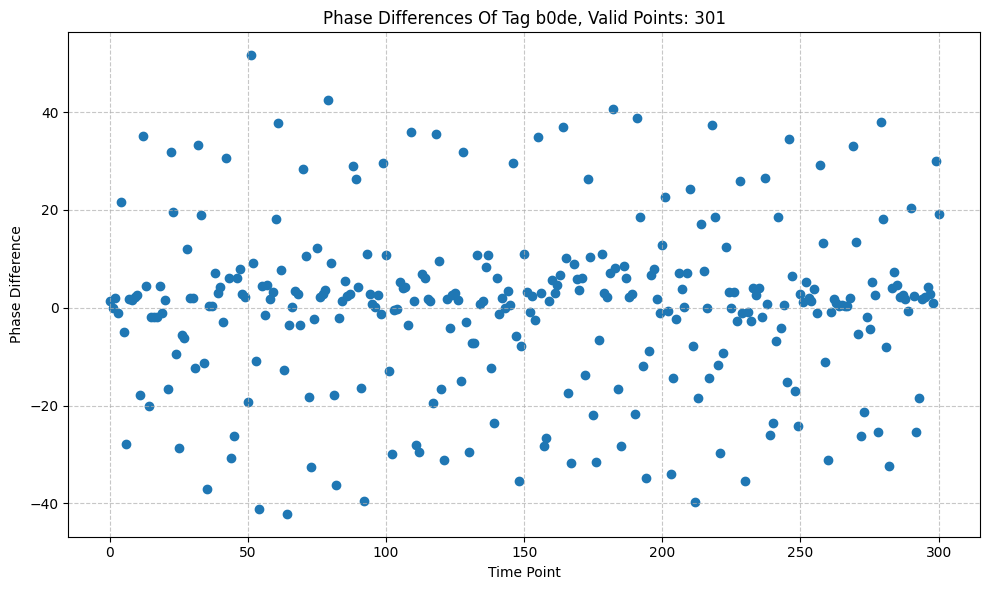

data\RFID\final\行走002.csv


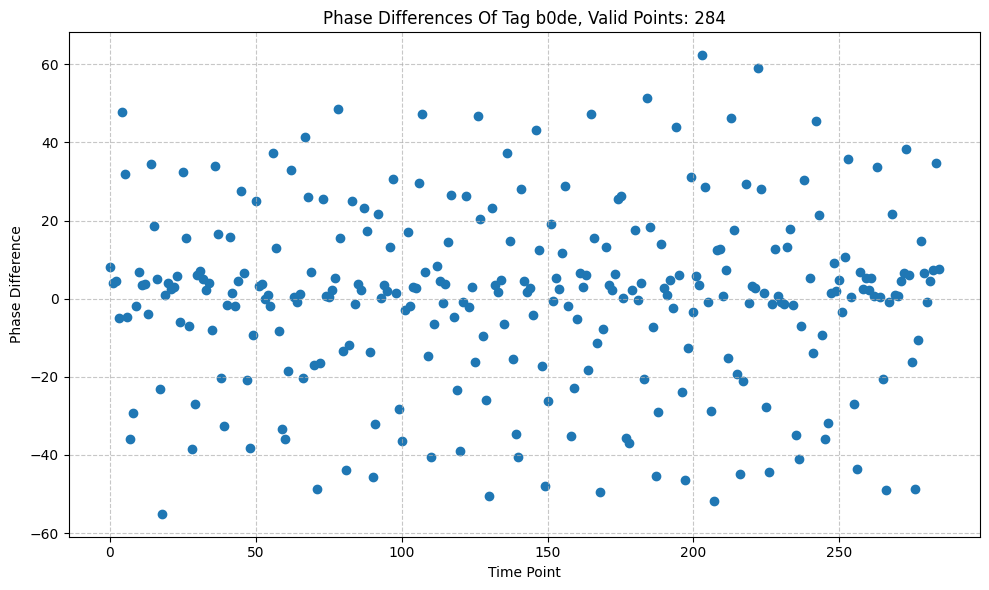

data\RFID\final\蹲下001.csv


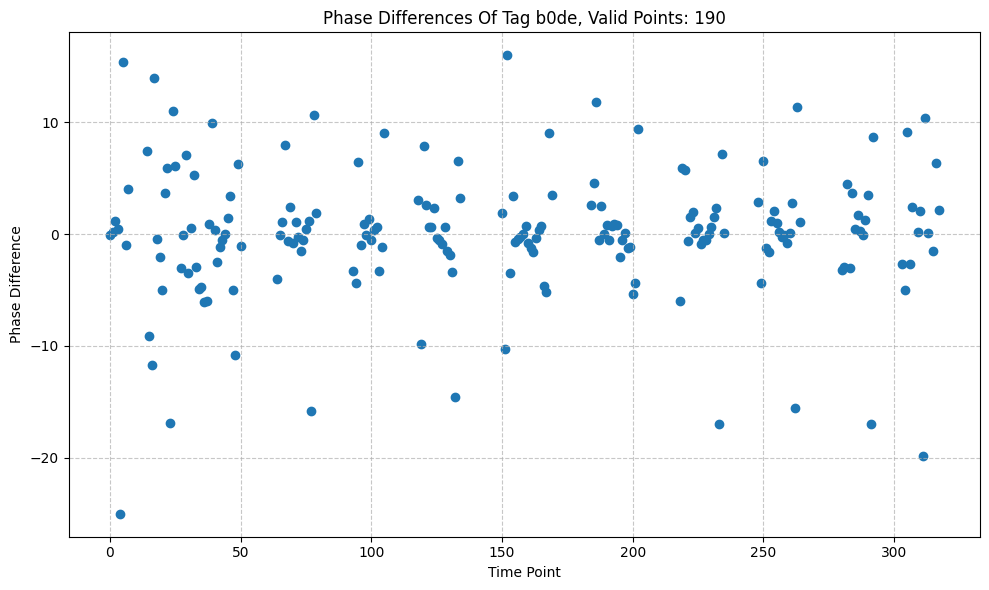

data\RFID\final\蹲下002.csv


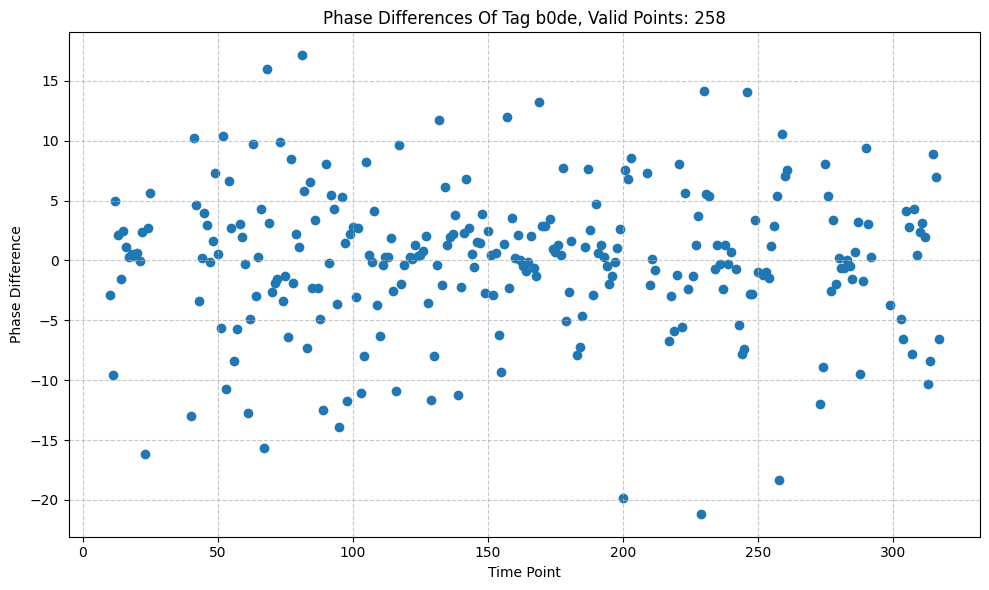

data\RFID\final\静止001.csv


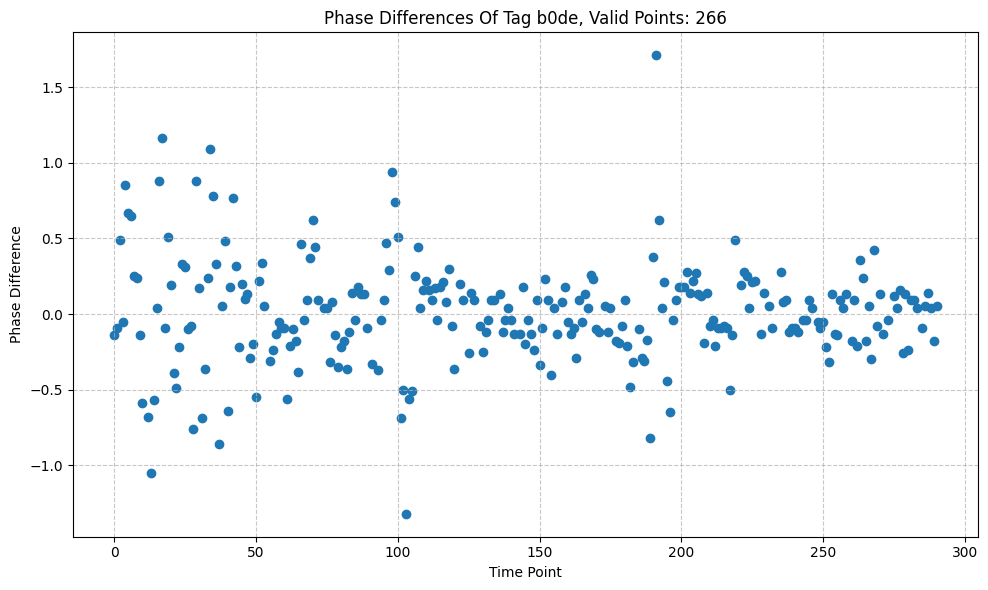

data\RFID\final\静止002.csv


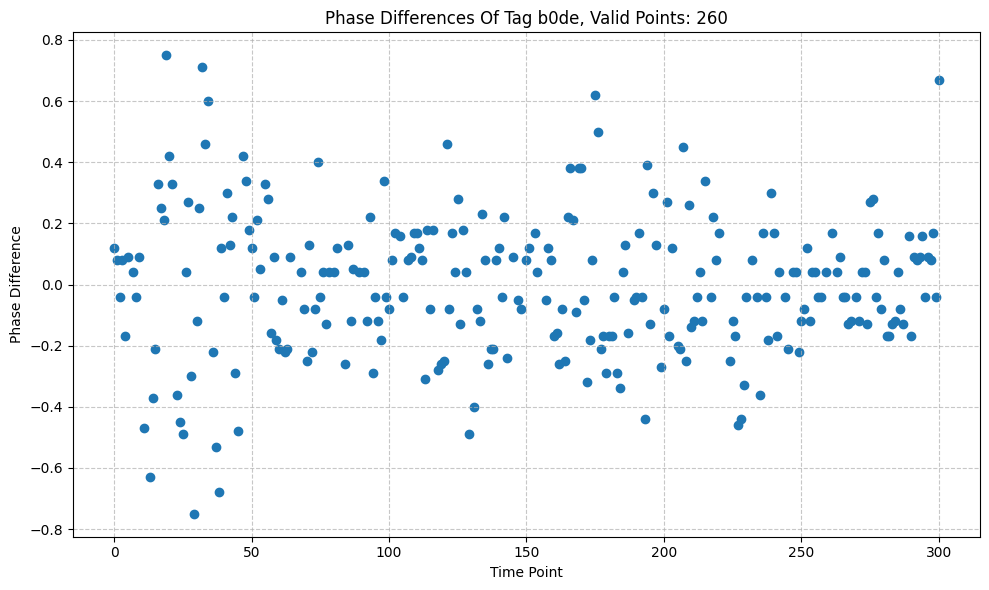

In [8]:
import os
tag_name="b0de"
for file_name in os.listdir(output_dir):
    if not file_name.endswith("mask.csv"):
        path = os.path.join(output_dir, file_name)
        print(path)
        plot_phase_diff_scatter(
            path,
            tag_name,
            limit=500,
            offset=0,
        )